# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

A comparison between several machine learning algorithms is presented:
Logistic regression,
Decision Tree Classifier,
KNN classifier,
Random Forest classifier,

### Data exploration 

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from __future__ import division
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#Load data
df_titanic_train = pd.read_csv('train.csv')
df_titanic_test = pd.read_csv('test.csv')
#How many NaN by columns in training set
print df_titanic_train.isnull().sum()
#Survivors in training set
deaths, sur  = np.bincount(df_titanic_train['Survived'].values)
print 'Number of survivors: %d' % sur
print 'Number of deaths: %d' % deaths
print 'Survival rate: %.2f %% ' % (100*sur/(sur+deaths))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of survivors: 342
Number of deaths: 549
Survival rate: 38.38 % 


##### Categorical data


#### Titles

In [3]:
#Training set
title = []
titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Col.','Major.', 'Mme.', 'Ms.', 'Mlle.',
          'Lady.','Sir.','Capt.','the Countess. of', 'Jonkheer.','Dona.']

unique_titles = ['Capt.','the Countess. of', 'Jonkheer.', 'Sir.']

for i in df_titanic_train['Name']:
    for word in titles:
        if word in i:
            title.append(word)


for i,j in enumerate(title):
    if j in unique_titles:
        title[i] = 'unique'
    elif j == 'Mlle.':
        title[i] = 'Miss.'
    elif j == 'Lady.':
        title[i] = 'Miss.'
    elif j == 'Ms.':
        title[i] = 'Miss.'
    elif j == 'Mme.':
        title[i] = 'Mrs.'
    elif j == 'Dona.':
        title[i] = 'Mrs.'
    elif j == 'Don.':
        title[i] = 'Mr.'
        
df_titanic_train['title'] = title

In [4]:
#Test set
title = []

for i in df_titanic_test['Name']:
    for word in titles:
        if word in i:
            title.append(word)


for i,j in enumerate(title):
    if j in unique_titles:
        title[i] = 'unique'
    elif j == 'Mlle.':
        title[i] = 'Miss.'
    elif j == 'Lady.':
        title[i] = 'Miss.'
    elif j == 'Ms.':
        title[i] = 'Miss.'
    elif j == 'Mme.':
        title[i] = 'Mrs.'
    elif j == 'Dona.':
        title[i] = 'Mrs.'
    elif j == 'Don.':
        title[i] = 'Mr.'

df_titanic_test['title'] = title

In [5]:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [6]:
print df_titanic_train['Sex'].value_counts(), '\n'
print df_titanic_train['Embarked'].value_counts() , '\n'
print df_titanic_train['SibSp'].value_counts() , '\n'
print df_titanic_train['Parch'].value_counts() , '\n'

male      577
female    314
Name: Sex, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 



In [7]:
#A fare value in the test set is missing
df_test_3class = df_titanic_test[(df_titanic_test['Pclass']==3)]
avg_fare = np.mean(df_test_3class['Fare'])
std_fare = np.std(df_test_3class['Fare'])
df_titanic_test.loc[pd.isnull(df_titanic_test['Fare']),'Fare'] = np.random.uniform(avg_fare - std_fare, avg_fare + std_fare) 

#### Averages, box plot

Average of Number of Siblings/Spouses: 0.52
Average of Number of Parents/Children: 0.38
Average Fare: 32.20
Average Age: 29.70 



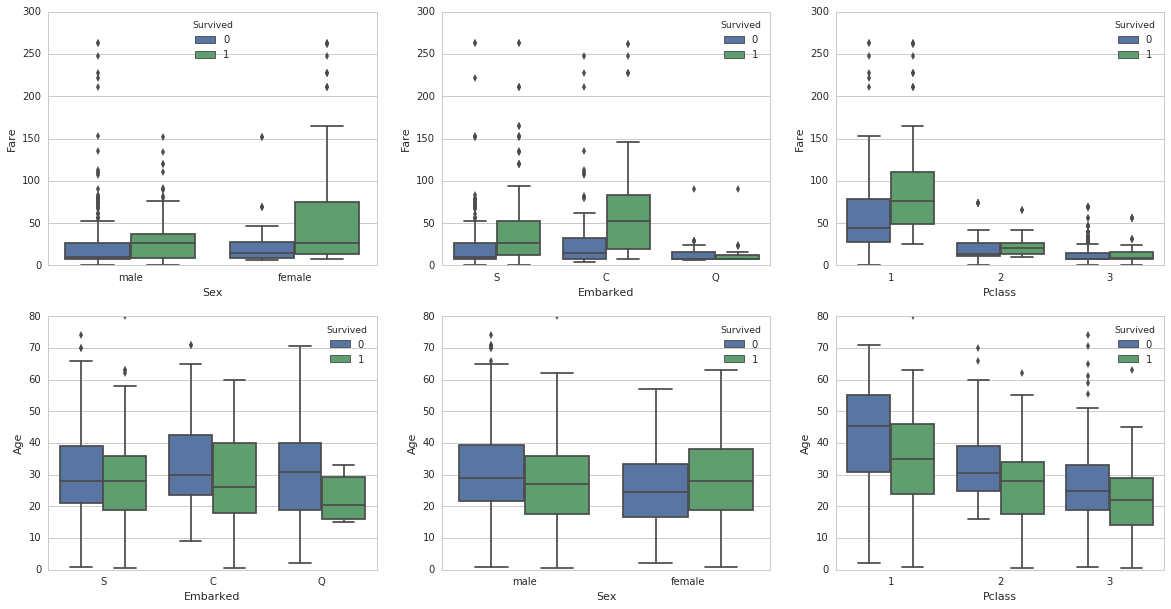

In [8]:

import seaborn as sns
sns.set_style("whitegrid")

#Averages
print 'Average of Number of Siblings/Spouses: %.2f' % np.mean(df_titanic_train['SibSp'].values)
print 'Average of Number of Parents/Children: %.2f' % np.mean(df_titanic_train['Parch'].values)
print 'Average Fare: %.2f' % np.mean(df_titanic_train['Fare'].values)
print 'Average Age: %.2f' % np.mean(df_titanic_train['Age'][pd.notnull(df_titanic_train['Age'].values)]), '\n'


#Drop 3 outliers 
df_titanic_train.drop(df_titanic_train.index[[np.argmax(df_titanic_train['Fare'].values)]], inplace=True)
df_titanic_train.drop(df_titanic_train.index[[np.argmax(df_titanic_train['Fare'].values)]], inplace=True)
df_titanic_train.drop(df_titanic_train.index[[np.argmax(df_titanic_train['Fare'].values)]], inplace=True)

f, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2,3,figsize=(20,10))
sns.boxplot(x='Sex', y='Fare',hue='Survived', data=df_titanic_train, ax=ax)
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=df_titanic_train, ax=ax1)
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df_titanic_train, ax=ax2)

#Subgroup Age != NaN
df_titanic_age = df_titanic_train[pd.notnull(df_titanic_train['Age'])]
sns.boxplot(x='Embarked', y='Age', hue='Survived', data=df_titanic_age, ax=ax3)
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df_titanic_age, ax=ax4)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df_titanic_age, ax=ax5)


#### Predicting age

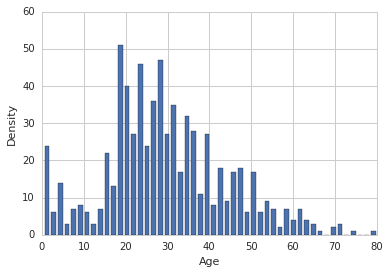

In [9]:
#Original age histogram

hist, bins = np.histogram(df_titanic_age['Age'].values, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [10]:
#Assigning random age within mean and std

avg_age = np.mean(df_titanic_train['Age'][pd.notnull(df_titanic_train['Age'].values)])
std_age = np.std(df_titanic_train['Age'][pd.notnull(df_titanic_train['Age'].values)])
rand_age = np.random.randint(avg_age - std_age, avg_age + std_age, 
                             size = np.size(df_titanic_train['Age'][pd.isnull(df_titanic_train['Age'].values)]) ) 
df_titanic_train.loc[pd.isnull(df_titanic_train['Age']),'Age'] = rand_age

#For test set
avg_age_test = np.mean(df_titanic_test['Age'][pd.notnull(df_titanic_test['Age'].values)])
std_age_test = np.std(df_titanic_test['Age'][pd.notnull(df_titanic_test['Age'].values)])
rand_age_test = np.random.randint(avg_age_test - std_age_test, avg_age_test + std_age_test, 
                             size = np.size(df_titanic_test['Age'][pd.isnull(df_titanic_test['Age'].values)]) ) 
df_titanic_test.loc[pd.isnull(df_titanic_test['Age']),'Age'] = rand_age_test


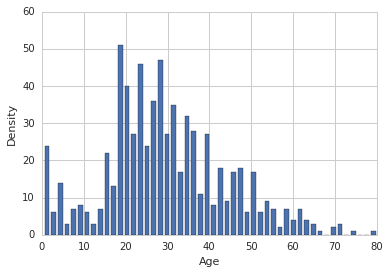

In [11]:
#New age histogram with random values

hist, bins = np.histogram(df_titanic_age['Age'].values, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [12]:
#Drop columns Name, Cabin, ticket
df_titanic_train.drop('Name', 1, inplace=True)
df_titanic_train.drop('Cabin', 1, inplace=True)
df_titanic_train.drop('Ticket', 1, inplace=True)
df_titanic_train = df_titanic_train[pd.notnull(df_titanic_train['Embarked'])]
print(df_titanic_train.values.shape)

#Same for test set
df_titanic_test.drop('Name', 1, inplace=True)
df_titanic_test.drop('Cabin', 1, inplace=True)
df_titanic_test.drop('Ticket', 1, inplace=True)

df_titanic_train.tail()

(886, 10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
886,887,0,2,male,27.0,0,0,13.00,S,Rev.
887,888,1,1,female,19.0,0,0,30.00,S,Miss.
888,889,0,3,female,17.0,1,2,23.45,S,Miss.
889,890,1,1,male,26.0,0,0,30.00,C,Mr.
890,891,0,3,male,32.0,0,0,7.75,Q,Mr.


In [13]:
#Transform sex variable to classes
LE = LabelEncoder()
df_titanic_train['Sex'] = LE.fit_transform(df_titanic_train['Sex']) 
print 'Classes for Sex:', np.bincount(df_titanic_train['Sex'].values)
df_titanic_test['Sex'] = LE.transform(df_titanic_test['Sex'])

#Transform Embarked variable to classes
LE2 =LabelEncoder()
df_titanic_train['Embarked'] = LE2.fit_transform(df_titanic_train['Embarked'])
print 'Classes for Embarked:', np.bincount(df_titanic_train['Embarked'].values)
df_titanic_test['Embarked'] = LE2.transform(df_titanic_test['Embarked'])

#Transform Title variable to classes
LE3 =LabelEncoder()
df_titanic_train['title'] = LE2.fit_transform(df_titanic_train['title'])
print 'Classes for Title:', np.bincount(df_titanic_train['title'].values)
df_titanic_test['title'] = LE2.transform(df_titanic_test['title'])

Classes for Sex: [311 575]
Classes for Embarked: [165  77 644]
Classes for Title: [  2   7   2  40 184 516 125   6   4]


In [14]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.2500,2,5
1,2,1,1,0,38.0,1,0,71.2833,0,6
2,3,1,3,0,26.0,0,0,7.9250,2,4
3,4,1,1,0,35.0,1,0,53.1000,2,6
4,5,0,3,1,35.0,0,0,8.0500,2,5


#### One Hot encoding and standarization

In [15]:
X = df_titanic_train.iloc[:,2:].values
y = df_titanic_train.iloc[:,1].values
X_sub = df_titanic_test.iloc[:,1:].values

#One hot encoding of all variables but Fare and age
#In test data there are values that are not present in the training set (Parch=9)

ohe = OneHotEncoder(categorical_features=[0, 1, 3, 4, 6, 7])
X_sub_ohe = ohe.fit_transform(X_sub).toarray()
X_ohe = ohe.transform(X).toarray()


#Standarize features
sc1 = StandardScaler()
sc2 = StandardScaler()
X_ohe[:,-1] = sc1.fit_transform(X_ohe[:,-1].reshape(-1,1)).ravel()
X_ohe[:,-2] = sc2.fit_transform(X_ohe[:,-2].reshape(-1,1)).ravel()

X_sub_ohe[:,-1] = sc1.transform(X_sub_ohe[:,-1].reshape(-1,1)).ravel()
X_sub_ohe[:,-2] = sc2.transform(X_sub_ohe[:,-2].reshape(-1,1)).ravel()

In [17]:
#Separate training set in training and validation

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=1)


#### Validation and learning curves

In [18]:
def validation_curve_plot(param, param_range, train_scores, test_scores, log=False):
    train_mean=np.mean(train_scores, axis=1)
    train_std=np.std(train_scores, axis=1)
    test_mean=np.mean(test_scores, axis=1)
    test_std=np.std(test_scores, axis=1)
    %matplotlib inline
    plt.plot(param_range, train_mean, label='Training accuracy')
    plt.fill_between(param_range, train_mean - train_std, train_mean +train_std, color='blue', alpha=0.5)
    plt.plot(param_range, test_mean, label='validation accuracy')
    plt.fill_between(param_range, test_mean - test_std, test_mean +test_std, color='green', alpha=0.5)
    plt.legend(loc='lower right')
    plt.title('Validation curve')
    plt.grid()
    plt.xlabel(param)
    plt.ylabel('CV Accuracy')
    if log:
        plt.xscale('log')
    plt.show()

def learning_curve_plot(train_sizes, train_scores, test_scores):
    train_mean=np.mean(train_scores, axis=1)
    train_std=np.std(train_scores, axis=1)
    test_mean=np.mean(test_scores, axis=1)
    test_std=np.std(test_scores, axis=1)
    %matplotlib inline
    plt.plot(train_sizes, train_mean, label='training accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean +train_std, color='blue', alpha=0.5)
    plt.plot(train_sizes, test_mean, label='validation accuracy')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean +test_std, color='green', alpha=0.5)
    plt.title('Learning curve')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Training Samples')
    plt.ylabel('CV Accuracy')
    plt.show()


### ML algorithms

#### LOGISTIC REGRESSION

In [59]:
log_reg = LogisticRegression(C=1, solver='liblinear', penalty='l1')
log_reg.fit(X_train, y_train)
print('Train accuracy: %.3f' % (log_reg.score(X_train, y_train)))
print('Test accuracy: %.3f' % (log_reg.score(X_test, y_test)))
y_pred_test = log_reg.predict(X_test)
scores = cross_val_score(estimator=log_reg, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))


Train accuracy: 0.838
Test accuracy: 0.826
ROC AUC: 0.86 +/- 0.04


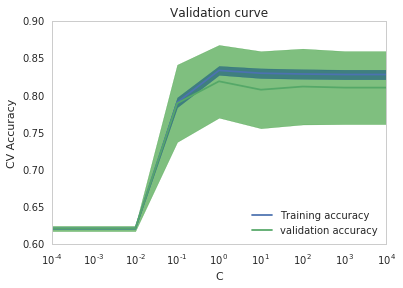

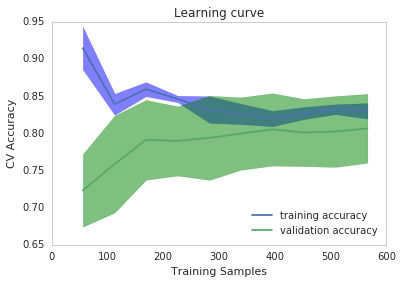

In [54]:
param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_scores, test_scores = validation_curve(estimator=log_reg, X=X_train, y=y_train,
                                             param_name='C', param_range=param_range, cv=10)
validation_curve_plot('C', param_range, train_scores, test_scores, log=True)

train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(estimator=log_reg, X=X_train, y=y_train, cv=5, train_sizes=train_sizes)
learning_curve_plot( train_sizes, train_scores, test_scores )

#### K NEIGHREST NEIGHBORS

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, p=1, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
acc = accuracy_score(y_pred_test, y_test)
acc2 = accuracy_score(y_pred_train, y_train)

print('Train Accuracy %.3f' % acc2)
print('Test Accuracy %.3f' % acc)
scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('ROC AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Train Accuracy 0.845
Test Accuracy 0.848
ROC AUC: 0.81 +/- 0.05


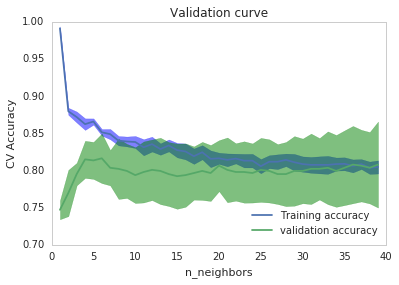

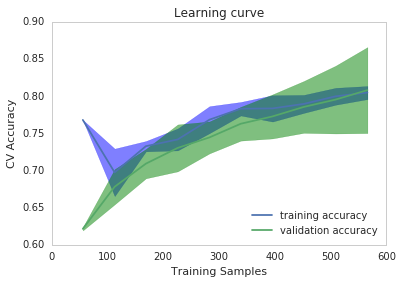

In [22]:
param_range=xrange(1,40)
train_scores, test_scores = validation_curve(estimator=knn, X=X_train, y=y_train,
                                             param_name='n_neighbors', param_range=param_range, cv=5)
validation_curve_plot('n_neighbors', param_range, train_scores, test_scores)

train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_train, y=y_train, cv=5, train_sizes=train_sizes)
learning_curve_plot(train_sizes, train_scores, test_scores)



#### RANDOM FORESTS

In [51]:
forest = RandomForestClassifier(random_state = 2, n_estimators = 23, max_depth=6)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)
acc = accuracy_score(y_pred_test, y_test)
acc2 = accuracy_score(y_pred_train, y_train)

print('Train Accuracy %.3f' % acc2)
print('Test Accuracy %.3f' % acc)
scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Train Accuracy 0.860
Test Accuracy 0.860
ROC AUC: 0.86 +/- 0.04


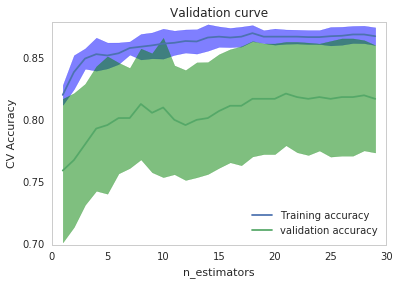

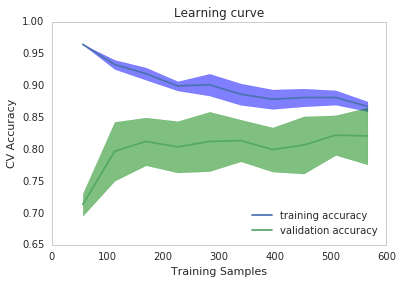

In [28]:
param_range=xrange(1,30)
train_scores, test_scores = validation_curve(estimator=forest, X=X_train, y=y_train,
                                             param_name='n_estimators', param_range=param_range, cv=5)
validation_curve_plot('n_estimators', param_range, train_scores, test_scores)

train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train, y=y_train, cv=5, train_sizes=train_sizes)
learning_curve_plot(train_sizes, train_scores, test_scores)


#### Ensemble

In [98]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator

class  Ensemble(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
    def fit(self, X, y):
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ =self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(seld.predict_proba(X), axis=1)
        else:
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)), axis=1, arr=predictions)
            maj_vote =self.lablenc_.inverse_transform(maj_vote)
            return maj_vote
    
    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        if not deep:
            return super(Ensemble, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

ens = Ensemble(classifiers=[knn, forest, log_reg])
scores = cross_val_score(estimator=ens, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('Accuracy: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Accuracy: 0.82 +/- 0.05


### Reciever Operating Characteristic

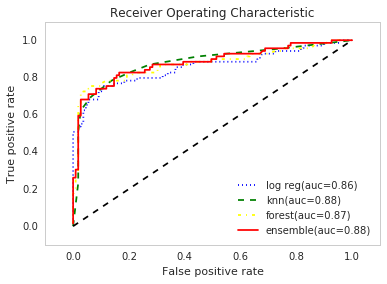

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

all_clf = [log_reg, knn,forest, ens]
clf_labels = ['log reg', 'knn','forest', 'ensemble']
colors = ['blue', 'green','yellow', 'red']
linestyles =[':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s(auc=%0.2f)' % (label, roc_auc))


plt.plot([0, 1], [0, 1], linestyle='--', c='black')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Train with all data

In [36]:
ens.fit(X_ohe, y)
scores = cross_val_score(estimator=ens, X=X_ohe, y=y, cv=10, scoring='accuracy')
print('accuracy: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

accuracy: 0.83 +/- 0.04


In [37]:
#Submission
sub_predict = ens.predict(X_sub_ohe)

submission = pd.DataFrame({
        "PassengerId": df_titanic_test["PassengerId"],
        "Survived": sub_predict
    })
submission.to_csv('titanic.csv', index=False)

In [38]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


#### Jack Dawson prediction: 20 years old, third class, boarded in Southampton

In [66]:
#Estimate fare (won ticket  in poker game)
df_titanic_3 = df_titanic_train[(df_titanic_train['Pclass']==3)]
avg_fare = np.mean(df_titanic_3['Fare'].values)
std_fare = np.std(df_titanic_3['Fare'].values)
jack_fare = np.random.uniform(avg_fare - std_fare, avg_fare + std_fare) 

#Transform and predict
X_jack = np.asarray([3, 1, 20, 0, 1, jack_fare, 2])
X_jack_ohe = ohe.transform(X_jack).toarray()
X_jack_ohe[:,-1] = sc.transform(X_jack_ohe[:,-1].reshape(1, -1)).ravel()
X_jack_ohe[:,-2] = sc.transform(X_jack_ohe[:,-2].reshape(1, -1)).ravel()
print 'Jack Dawson survival prediction (0:did not survive, 1:survived):', ens.predict(X_jack_ohe)

Jack Dawson survival prediction: [0]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


#### Rose DeWitt Bukater

In [54]:
df_titanic_1 = df_titanic_train[(df_titanic_train['Pclass']==1)]
avg_fare = np.mean(df_titanic_1['Fare'].values)
std_fare = np.std(df_titanic_1['Fare'].values)
rose_fare = np.random.uniform(avg_fare - std_fare, avg_fare + std_fare) 

#Transform and predict
X_rose = np.asarray([1, 0, 20, 0, 1, rose_fare, 2])
X_rose_ohe = ohe.transform(X_rose).toarray()
X_rose_ohe[:,-1] = sc.transform(X_rose_ohe[:,-1].reshape(-1, 1)).ravel()
X_rose_ohe[:,-2] = sc.transform(X_rose_ohe[:,-2].reshape(-1, 1)).ravel()
print 'Rose DeWitt Bukater survival prediction (0:did not survive, 1:survived):', ens.predict(X_rose_ohe)

Rose DeWitt Bukater survival prediction: [1]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
